# Biodiversity in National Parks

In this project for codecademy, I will be looking at the biodiversity in four national parks

## Importing Modules


In [126]:
import matplotlib
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

## Loading Data

In [6]:
species = pd.read_csv('species_info.csv')
print(species.head())
observations = pd.read_csv('observations.csv')
print(observations.head())

  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   

                                        common_names conservation_status  
0                           Gapper's Red-Backed Vole                 NaN  
1                              American Bison, Bison                 NaN  
2  Aurochs, Aurochs, Domestic Cattle (Feral), Dom...                 NaN  
3  Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)                 NaN  
4                                      Wapiti Or Elk                 NaN  
            scientific_name                            park_name  observations
0        Vicia benghalensis  Great Smoky Mountains National Park            68
1            Neovison vison  Great Smoky Mountains National Park            77
2         Prunus subcordata               

## Exploring Data

In [28]:
sp_obs = pd.merge(species, observations, how='left', on='scientific_name')
print(sp_obs.head())

  category                scientific_name              common_names  \
0   Mammal  Clethrionomys gapperi gapperi  Gapper's Red-Backed Vole   
1   Mammal  Clethrionomys gapperi gapperi  Gapper's Red-Backed Vole   
2   Mammal  Clethrionomys gapperi gapperi  Gapper's Red-Backed Vole   
3   Mammal  Clethrionomys gapperi gapperi  Gapper's Red-Backed Vole   
4   Mammal                      Bos bison     American Bison, Bison   

  conservation_status                            park_name  observations  
0                 NaN                  Bryce National Park           130  
1                 NaN            Yellowstone National Park           270  
2                 NaN  Great Smoky Mountains National Park            98  
3                 NaN               Yosemite National Park           117  
4                 NaN               Yosemite National Park           128  


In [29]:
sp_obs.conservation_status.unique()

array([nan, 'Species of Concern', 'Endangered', 'Threatened',
       'In Recovery'], dtype=object)

In [30]:
sp_obs.park_name.unique()

array(['Bryce National Park', 'Yellowstone National Park',
       'Great Smoky Mountains National Park', 'Yosemite National Park'],
      dtype=object)

In [31]:
sp_obs.category.unique()

array(['Mammal', 'Bird', 'Reptile', 'Amphibian', 'Fish', 'Vascular Plant',
       'Nonvascular Plant'], dtype=object)

In [91]:
sp_obs_ = sp_obs.fillna('No Threat', inplace=True)
print(sp_obs.head())

  category                scientific_name              common_names  \
0   Mammal  Clethrionomys gapperi gapperi  Gapper's Red-Backed Vole   
1   Mammal  Clethrionomys gapperi gapperi  Gapper's Red-Backed Vole   
2   Mammal  Clethrionomys gapperi gapperi  Gapper's Red-Backed Vole   
3   Mammal  Clethrionomys gapperi gapperi  Gapper's Red-Backed Vole   
4   Mammal                      Bos bison     American Bison, Bison   

  conservation_status                            park_name  observations  
0           No Threat                  Bryce National Park           130  
1           No Threat            Yellowstone National Park           270  
2           No Threat  Great Smoky Mountains National Park            98  
3           No Threat               Yosemite National Park           117  
4           No Threat               Yosemite National Park           128  


## Analyzing Data

In [98]:
group_name_cat = sp_obs.groupby(['park_name', 'category'])['observations'].sum().unstack()
print(group_name_cat)
#type(group_name_cat)



category                             Amphibian    Bird   Fish  Mammal  \
park_name                                                               
Bryce National Park                       7542   58590  12823   28830   
Great Smoky Mountains National Park       5876   42869   9482   21056   
Yellowstone National Park                19937  144300  31459   70701   
Yosemite National Park                   11713   86612  19137   42533   

category                             Nonvascular Plant  Reptile  \
park_name                                                         
Bryce National Park                              32992     8141   
Great Smoky Mountains National Park              24857     5841   
Yellowstone National Park                        83021    20061   
Yosemite National Park                           49783    11779   

category                             Vascular Plant  
park_name                                            
Bryce National Park                          48437

In [127]:
matplotlib.rc_file_defaults()

Text(0.5, 0, 'Park Name')

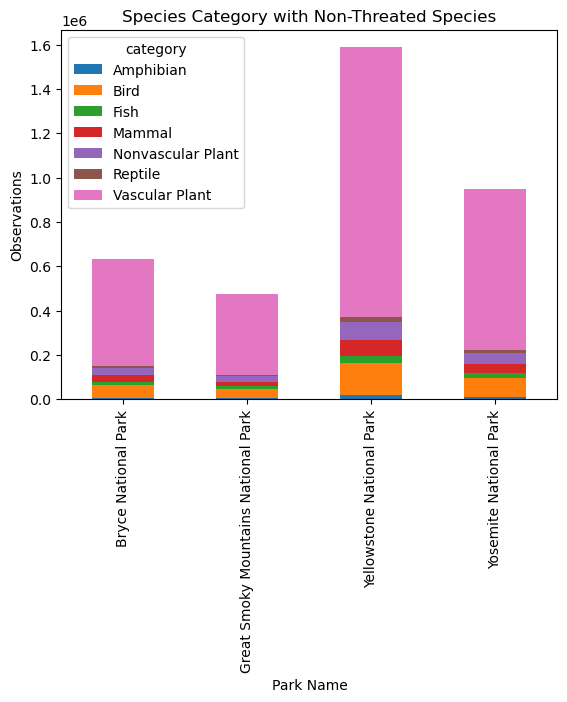

In [128]:
ax = group_name_cat.plot(kind='bar', stacked=True)
ax.set_title('Species Category with Non-Threated Species')
ax.set_ylabel('Observations')
ax.set_xlabel('Park Name')

In [105]:
group_name_cat_threat = sp_obs[sp_obs.conservation_status != 'No Threat'].groupby(['park_name', 'category'])['observations'].sum().unstack()
print(group_name_cat)

category                             Amphibian    Bird   Fish  Mammal  \
park_name                                                               
Bryce National Park                       7542   58590  12823   28830   
Great Smoky Mountains National Park       5876   42869   9482   21056   
Yellowstone National Park                19937  144300  31459   70701   
Yosemite National Park                   11713   86612  19137   42533   

category                             Nonvascular Plant  Reptile  \
park_name                                                         
Bryce National Park                              32992     8141   
Great Smoky Mountains National Park              24857     5841   
Yellowstone National Park                        83021    20061   
Yosemite National Park                           49783    11779   

category                             Vascular Plant  
park_name                                            
Bryce National Park                          48437

Text(0.5, 0, 'Park Name')

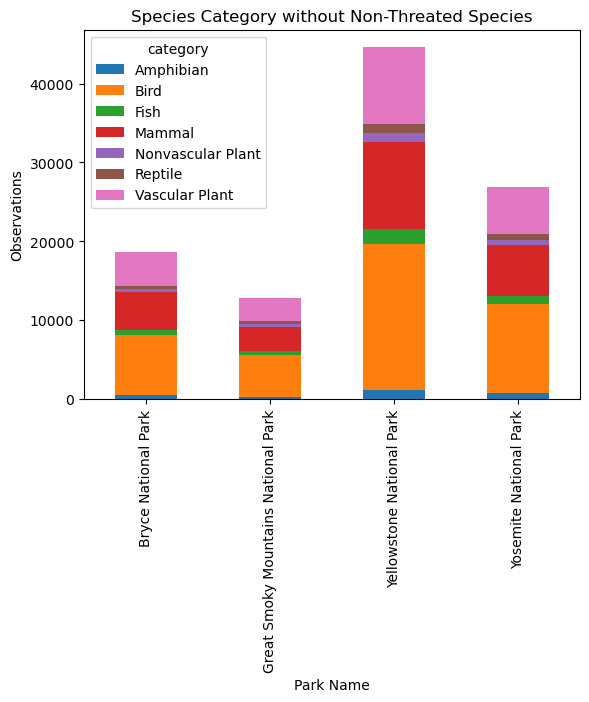

In [129]:
ax = group_name_cat_threat.plot(kind='bar', stacked=True)
ax.set_title('Species Category without Non-Threated Species')
ax.set_ylabel('Observations')
ax.set_xlabel('Park Name')

category                             Amphibian       Bird      Fish  \
park_name                                                             
Bryce National Park                   6.603023  12.985151  5.700694   
Great Smoky Mountains National Park   5.667120  12.356248  5.768825   
Yellowstone National Park             5.853438  12.838531  5.960139   
Yosemite National Park                6.437292  13.038609  5.518106   

category                                Mammal  Nonvascular Plant   Reptile  \
park_name                                                                     
Bryce National Park                  16.305931           1.473084  4.753716   
Great Smoky Mountains National Park  14.015008           1.500583  6.248930   
Yellowstone National Park            15.600911           1.408077  5.483276   
Yosemite National Park               15.197611           1.359902  5.806945   

category                             Vascular Plant  
park_name                                   

Text(0.5, 1.0, 'Percentage of Threated Species')

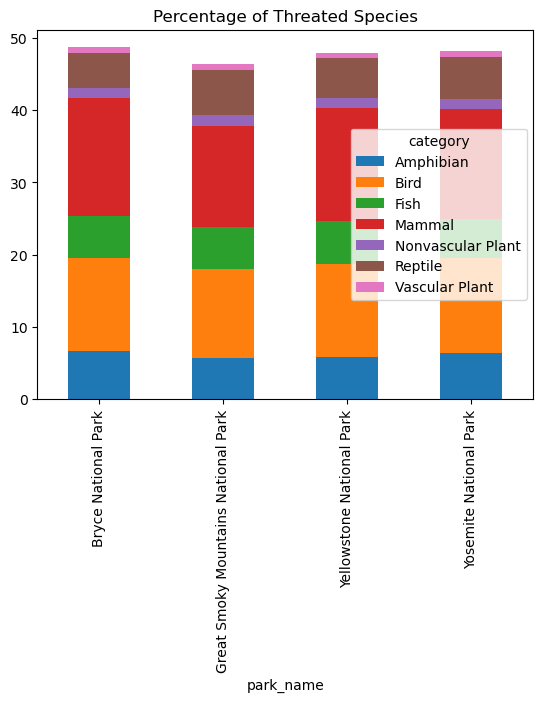

In [135]:
test = group_name_cat_threat/group_name_cat*100

print(test)

ax = test.plot(kind='bar', stacked=True)
ax.set_title('Percentage of Threated Species')

The above visulaization shows the percentage of threated species. It looks like for each park the percentages are apporimately equal. This can be seen when looking at the counts of observations of the species between the visulaization that shows the threated included and the one that does not inclue the threated species. The number of observations for vascular plants drastically decreased when only looking at those that are threated. Also the number of observations for mammals and birds goes up in comparison to the other groups as these are the most threated of the categories. 